<a href="https://colab.research.google.com/github/chai1357/sentimental_Analysis_4/blob/main/Task4_sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
# Install textblob and pandas
!pip install textblob --quiet
!pip install pandas --quiet

# Import libraries
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/data.csv', encoding='latin1')

# Show top 5 rows
df.head()


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
# Rename columns for easier handling (optional but good practice)
df.columns = ['sentiment', 'text']

# Check unique sentiment values
print(df['sentiment'].unique())

# Remove any null rows if exists
df.dropna(inplace=True)

# Display first few rows again after cleaning
df.head()


["The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model ."
 '$ESI on lows, down $1.50 to $2.50 BK a real possibility'
 "For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m ."
 ...
 'Nordic Walking was first used as a summer training method by cross-country skiers .'
 'According shipping company Viking Line , the EU decision will have a significant financial impact .'
 'HELSINKI AFX - KCI Konecranes said it has won an order for four hot metal ladle cranes from Indian steel producer Bhushan Steel and Strips Ltd. .']


,sentiment,text
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
from textblob import TextBlob

# Function to get polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Function to get subjectivity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Apply the functions to dataset
df['polarity'] = df['text'].apply(get_polarity)
df['subjectivity'] = df['text'].apply(get_subjectivity)

# Show updated dataframe
df.head()


,sentiment,text,polarity,subjectivity
0,The GeoSolutions technology will leverage Bene...,positive,0.227273,0.545455
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,-0.300000,0.400000
2,"For the last quarter of 2010 , Componenta 's n...",positive,0.227273,0.545455
3,According to the Finnish-Russian Chamber of Co...,neutral,0.000000,0.000000
4,The Swedish buyout firm has sold its remaining...,neutral,0.000000,0.000000


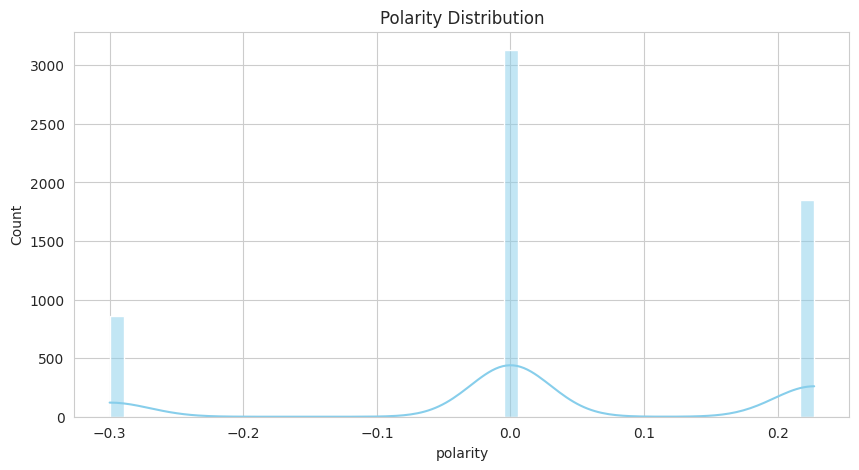

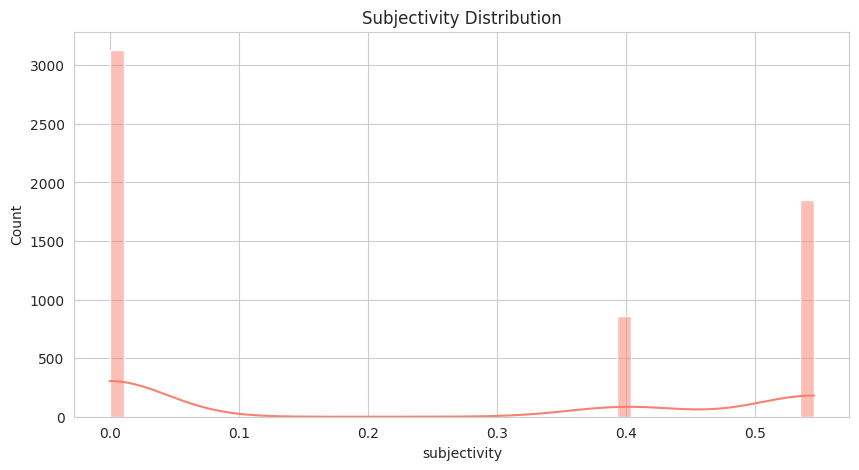

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Distribution of Polarity
plt.figure(figsize=(10,5))
sns.histplot(df['polarity'], bins=50, kde=True, color='skyblue')
plt.title('Polarity Distribution')
plt.show()

# Distribution of Subjectivity
plt.figure(figsize=(10,5))
sns.histplot(df['subjectivity'], bins=50, kde=True, color='salmon')
plt.title('Subjectivity Distribution')
plt.show()


In [ ]:
# Define sentiment category based on polarity score
def analyze_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply function
df['sentiment_category'] = df['polarity'].apply(analyze_sentiment)

# Display count of each sentiment
sentiment_counts = df['sentiment_category'].value_counts()

print("Sentiment Summary:")
print(sentiment_counts)


Sentiment Summary:
sentiment_category
Neutral     3130
Positive    1852
Negative     860
Name: count, dtype: int64


## Sentiment Analysis Report

This report summarizes the sentiment analysis performed on the provided dataset.

### Sentiment Distribution

The analysis categorized the text entries into three sentiment categories: Positive, Neutral, and Negative. The distribution of these categories is as follows:

In [ ]:
# Display the sentiment counts
print(sentiment_counts)

sentiment_category
Neutral     3130
Positive    1852
Negative     860
Name: count, dtype: int64


### Further Analysis (Optional)

Further analysis could involve:
- Examining representative examples of text from each sentiment category.
- Investigating the relationship between polarity and subjectivity scores.
- Exploring specific words or phrases that contribute to positive, neutral, or negative sentiments.

## Project Report: Sentiment Analysis

### Introduction

This report details a sentiment analysis project conducted on a given dataset. The objective was to analyze the sentiment expressed in text data and categorize it as positive, neutral, or negative.

### Methodology

1. **Data Loading and Preprocessing:** The dataset was loaded and initial inspection was performed. Column names were standardized for easier handling. Null values were removed to ensure data quality.
2. **Sentiment Scoring:** The TextBlob library was used to calculate the polarity and subjectivity scores for each text entry.
    - **Polarity:** A score ranging from -1 (highly negative) to +1 (highly positive) indicating the sentiment of the text.
    - **Subjectivity:** A score ranging from 0 (objective) to +1 (subjective) indicating how much of an opinion or feeling is expressed in the text.
3. **Sentiment Categorization:** Based on the polarity score, each text entry was categorized into 'Positive' (polarity > 0), 'Neutral' (polarity == 0), or 'Negative' (polarity < 0).
4. **Analysis and Visualization:** The distribution of polarity and subjectivity scores was visualized using histograms to understand the overall sentiment and expressiveness in the dataset. The counts of each sentiment category were calculated and presented.

### Results

The sentiment analysis yielded the following distribution of sentiment categories:

In [ ]:
print(sentiment_counts)

As shown above, the majority of the text entries were categorized as Neutral, followed by Positive and then Negative.

The distributions of polarity and subjectivity scores (as visualized earlier in the notebook) provide further insight into the sentiment and expressiveness of the data. The polarity distribution shows the range of sentiment scores, while the subjectivity distribution indicates how opinionated the text entries are.

### Conclusion

This sentiment analysis project successfully categorized the text data into positive, neutral, and negative sentiments. The results provide a clear overview of the sentiment distribution within the dataset. Further analysis could involve exploring the specific words and phrases that contribute to each sentiment category and investigating the relationship between polarity and subjectivity in more detail.